In [517]:
#Use this code if your panda_datareader is not working:
#-------------------------------------------------#
#conda install pandas-datareader
#pip install pandas-datareader
#-------------------------------------------------#

import numpy as np
from pandas_datareader import data as pdr
import math
import matplotlib.pyplot as plt

In [518]:
#Stock Symbol
stock_tick = "^DJI"

#Getting The data from yahoo finance
data = pdr.get_data_yahoo(stock_tick, start="2020-02-02", end="2022-01-31")

In [519]:
#The confidence Interval "x" and "N" day steps
N = 1
x = .95

#getting the number of sample size
data_len = len(data['Adj Close']) 

#the left tail  
tail_rsk = 1-x

#Math.floor rounds down the value. This will pick the left closest vlaue on the histogram  
tail_rsk_obser = math.floor((data_len)*tail_rsk)

In [520]:
#Getting the data in Percentage points with N as the period gap between the percentage points. Also dorpping the initial NaN value. 
data_close_pct = data['Adj Close']\
    .pct_change(periods=N)\
        .dropna()

#Sorting the data in ascending order
data_close_pct_sort = np.sort(data_close_pct)

#Getting the actual value corresponding to the observation number
tail_rsk_pct = float("{:.4f}".format(data_close_pct_sort[tail_rsk_obser]))

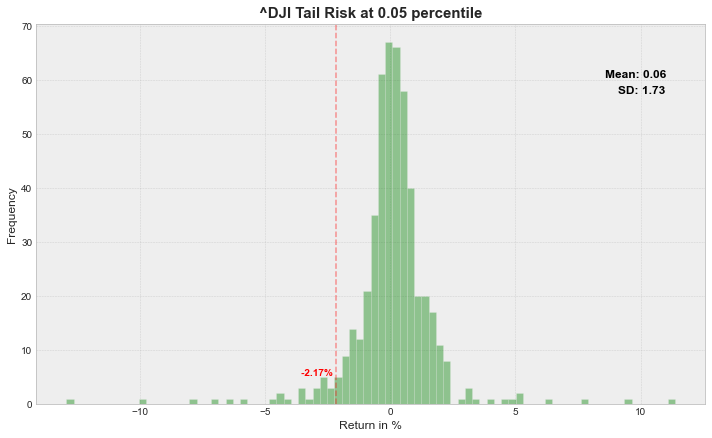

In [530]:
#Data Visualization
with plt.style.context('bmh'):
    plt.rcParams['figure.figsize'] = [12, 7]
    counts, bins, z= plt.hist(x=(data_close_pct_sort*100), bins='auto', color='green',rwidth=1,alpha = .4)
    
    mids = 0.5*(bins[1:] + bins[:-1])
    probs = counts / np.sum(counts)

    mean = float("{:.2f}".format(np.sum(probs * mids)))  
    sd = float("{:.2f}".format( np.sqrt(np.sum(probs * (mids - mean)**2)))) 
    
    plt.grid(axis='y', alpha=0.5)
    plt.grid(axis='x', alpha=0.5)
    plt.xlabel('Return in %')
    plt.ylabel('Frequency')
    plt.title(stock_tick + ' Tail Risk at ' + str(float("{:.4f}".format(tail_rsk))) +' percentile', fontweight="bold", fontsize = 15)
    
    #The line to 
    plt.axvline(tail_rsk_pct*100,color='red', linestyle='dashed', linewidth=1.5, alpha = .4)
    plt.text(tail_rsk_pct*100, (counts[tail_rsk_obser]+5), str(tail_rsk_pct*100) + '% ', ha='right', va='bottom', color = 'red',  fontweight="bold")

    plt.text(11, 60, 'Mean: ' +str(mean), ha='right', va='bottom', color = 'black',fontsize = 12,  fontweight="bold")
    plt.text(11, 57, 'SD: ' +str(sd), ha='right', va='bottom', color = 'black',fontsize = 12,  fontweight="bold")
plt.show()
